In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import auc, roc_auc_score, roc_curve, classification_report

In [2]:
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 12.1+ MB


In [5]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [6]:
data[data['age'] > 90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [7]:
data = data[data['age'] < 100]

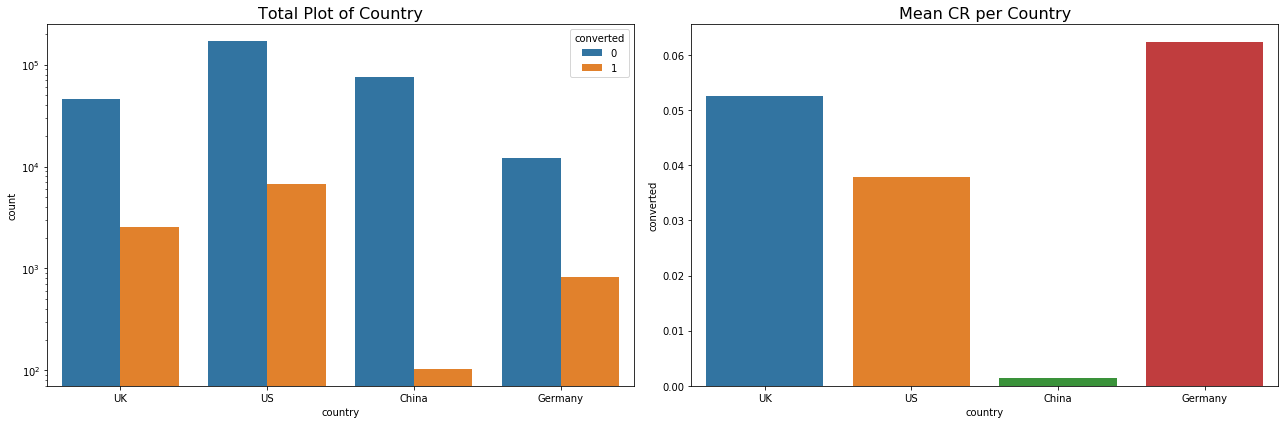

In [8]:
#visulization of different countries
grp_country = data[['country', 'converted']].groupby('country').mean().reset_index()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.countplot(x = 'country', hue = 'converted', data = data, ax = ax[0])
ax[0].set_title('Total Plot of Country', fontsize = 16)
ax[0].set_yscale('log')

sns.barplot(x = 'country', y = 'converted', data = grp_country, order = ['UK', 'US', 'China', 'Germany'], ax = ax[1])
ax[1].set_title('Mean CR per Country', fontsize = 16)
plt.tight_layout()
plt.show()

In [9]:
grp_country.head()


,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


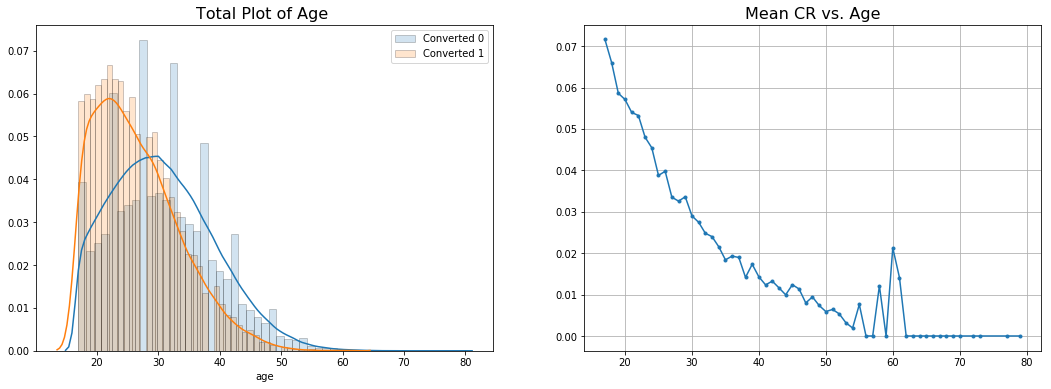

In [10]:
#visulization of different ages
grp_age = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws = {'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.distplot(data[data['converted'] == 0]['age'], label = 'Converted 0', ax = ax[0], hist_kws = hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label = 'Converted 1', ax = ax[0], hist_kws = hist_kws)
ax[0].set_title('Total Plot of Age ', fontsize = 16)
ax[0].legend()

ax[1].plot(grp_age['age'], grp_age['converted'], '.-')
ax[1].set_title('Mean CR vs. Age', fontsize = 16)
ax[1].grid(True)
plt.show()

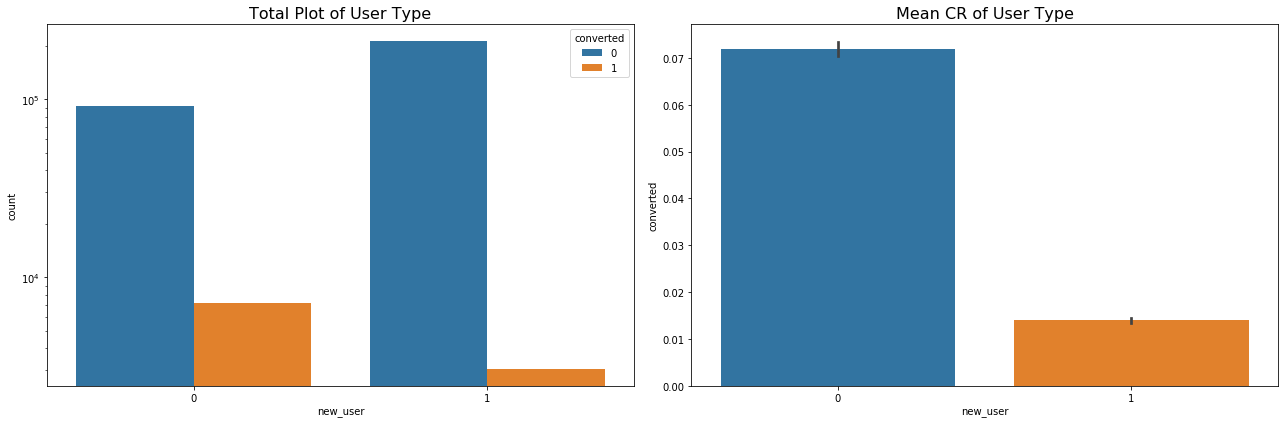

In [11]:
#visulization of new_user?
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.countplot(x = 'new_user', hue = 'converted', data = data, ax =ax[0])
ax[0].set_title('Total Plot of User Type', fontsize = 16)
ax[0].set_yscale('log')

#barplot by default show mean value, change using estimator
sns.barplot(x ='new_user', y = 'converted', data = data, ax = ax[1])
ax[1].set_title('Mean CR of User Type', fontsize = 16)
plt.tight_layout()
plt.show()


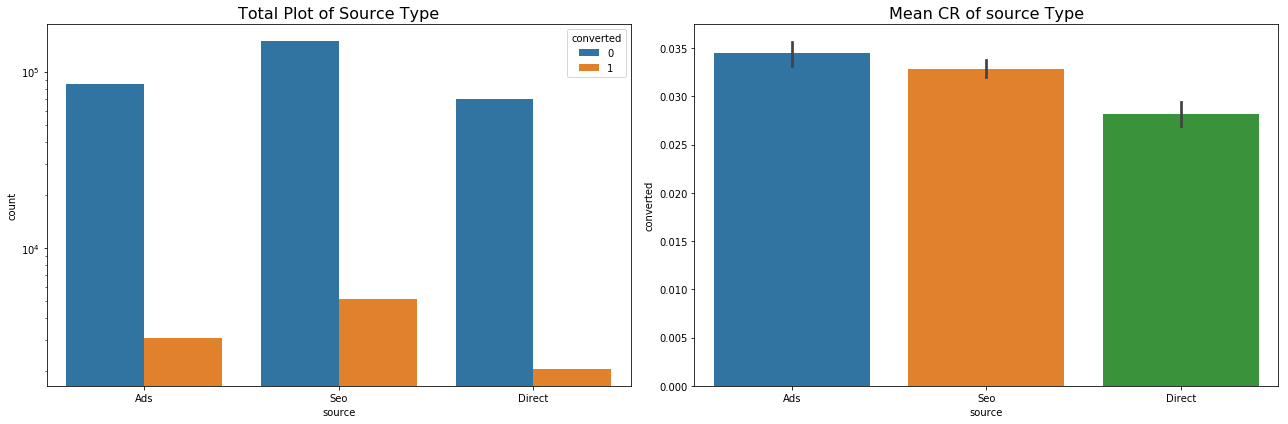

In [12]:
#visualization of different sources
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.countplot(x = 'source', hue = 'converted', data = data, ax =ax[0])
ax[0].set_title('Total Plot of Source Type', fontsize = 16)
ax[0].set_yscale('log')

#barplot by default show mean value, change using estimator
sns.barplot(x ='source', y = 'converted', data = data, ax = ax[1])
ax[1].set_title('Mean CR of source Type', fontsize = 16)
plt.tight_layout()
plt.show()

C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


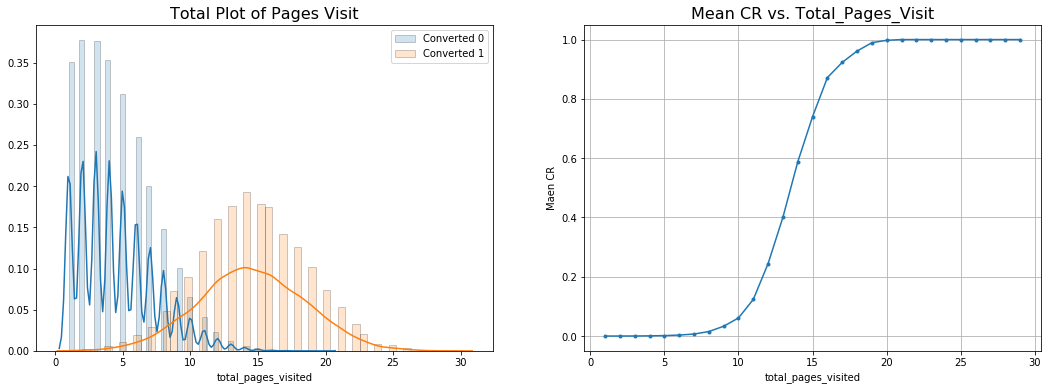

In [13]:
#visulization of total_pages_visited
grp_visit = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.distplot(data[data['converted'] ==0 ]['total_pages_visited'], label = 'Converted 0', ax = ax[0], hist_kws = hist_kws)
sns.distplot(data[data['converted'] ==1 ]['total_pages_visited'], label = 'Converted 1', ax = ax[0], hist_kws = hist_kws)
ax[0].set_title('Total Plot of Pages Visit', fontsize = 16)
ax[0].legend()

ax[1].plot(grp_visit['total_pages_visited'], grp_visit['converted'], '.-')
ax[1].set_title('Mean CR vs. Total_Pages_Visit', fontsize = 16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Maen CR')
ax[1].grid(True)
plt.show()

In [14]:
# Encoding the categorical into numeric values
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [15]:
lb_make = LabelEncoder()
data['country_code'] = lb_make.fit_transform(data['country'])
data[['country_code', 'country']].head(5)

,country_code,country
0,2,UK
1,3,US
2,3,US
3,0,China
4,3,US


In [16]:
data['source_code'] = lb_make.fit_transform(data['source'])
data[['source_code', 'source']].head(5)


,source_code,source
0,0,Ads
1,2,Seo
2,2,Seo
3,2,Seo
4,2,Seo


In [17]:
lb_data = data[['country_code','age', 'new_user','source_code', 'total_pages_visited','converted']]
lb_data.head(5)

,country_code,age,new_user,source_code,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0
2,3,28,1,2,4,0
3,0,39,1,2,5,0
4,3,30,1,2,6,0


In [18]:
#Machine Learning Using RandomForest
#split into training set and test set 75%
y = lb_data['converted']
X_train, X_test, y_train, y_test = train_test_split(lb_data.iloc[:,:-1], y, random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(237148, 5) (237148,)
(79050, 5) (79050,)


In [19]:
X_train.head(5)

,country_code,age,new_user,source_code,total_pages_visited
46918,0,33,1,2,8
58373,0,22,1,1,1
77719,0,40,1,2,1
305039,2,40,1,1,2
1359,3,33,1,0,1


In [20]:
rf0 = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state = 25, max_features = 'auto',min_samples_leaf = 40)
rf0.fit(X_train, y_train)
print ('Train Set Score:')
print (rf0.score(X_train, y_train))
print ('Test Set Score:')
print (rf0.score(X_test, y_test))
y_pred = rf0.predict(X_train)
y_test_pre = rf0.predict(X_test)
print ('AUC Score(Train):')
print (roc_auc_score(y_train, y_pred))
print ('AUC Score(Test):')
print (roc_auc_score(y_test, y_test_pre))

Train Set Score:
0.6609981728531238
Test Set Score:
0.6442204523203665
AUC Score(Train):
0.9904019126901604
AUC Score(Test):
0.979801234965496


feature ranking:
1. feature 4 (0.859873)
2. feature 2 (0.054549)
3. feature 0 (0.046328)
4. feature 1 (0.034602)
5. feature 3 (0.004648)


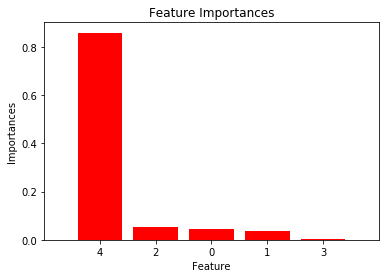

In [21]:
importances = rf0.feature_importances_
indices = np.argsort(importances)[::-1]

#print the feature ranking in train set:
print('feature ranking:')

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
#plot 
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = 'r', align = 'center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Importances', fontsize = 10)
plt.show()

In [22]:
train_fpr, train_tpr, _ = roc_curve(y_train, y_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pre)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

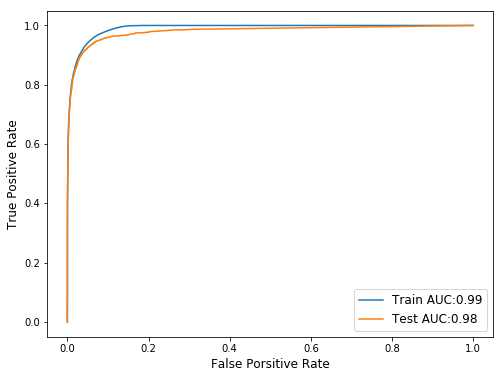

In [23]:
#plot roc curver
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(train_fpr, train_tpr, label = 'Train AUC:' + str(train_auc))
ax.plot(test_fpr, test_tpr, label = 'Test AUC:' + str(test_auc))
ax.set_xlabel('False Porsitive Rate', fontsize = 12)
ax.set_ylabel('True Positive Rate', fontsize = 12)
ax.legend(fontsize = 12)
plt.show()